***
# <font color=indianred size=10>Notebook - Questão 1</font>
***

# <font color=lightcoral>1) Resumo</font>
***

O objetivo dessa questão é entender se o novo modelo implementado traz mais ou menos compras dentro do aplicativo.

Para identificar isso foi criada uma coluna dentro do dataset para investigar quantos usuários abriam a página dos dealers x quantidade que consumavam a compra.

Após isso, foi avaliado tanto a mediana para verificar a dispersão dos dados. Ou seja, se na maioria das linhas do dataset a taxa de conversão de compras foi maior ou menos

Já a média foi utilizada para investigar se de fato houve ou não melhoria com o novo modelo. O que foi comprovado diante da evidência que o modelo anterior convertia aproximadamente 3,30% e no novo modelo 5,20%.

Ou seja, houve um crescimento de aproximadamente 57,6%

A análise exploratória seguiu para verificar possíveis insights. O que se verificou por exemplo, é que o novo modelo potencializou as vendas da Supergasbras em 225%, no entanto, reduziu as vendas da Liquigaz em 33%.

Alguns cálculos foram retirados com o objetivo de despoluir ao máximo o notebook

# <font color=lightcoral>2) Importando bibliotecas</font>
***

In [206]:
# Importando as bibliotecas


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

In [207]:
# Carregando o arquivo 

dataset = pd.read_csv('MobileDealer.csv')
dataset.head(1)

,DealerId,Distributor,DateSP,DriverId,OrderConfirmation,ExperimentGroup,Position,Price,PriceGap,Quality,Searches,TimeOnlineHours,Record Count
0,__N5mPZn22mlmHuB/pf9DzYyqbWP4HoYBtB9s0EBNLG7c=,SUPERGASBRAS,26 de nov. de 2019,0c953cbf-71f7-469e-9cc3-6c5417942da2,0,default,1.696997,75.134315,5.760939,4.5,33,0.133333,1


# <font color=lightcoral>3) Transformando os dados</font>
***

In [208]:
# Criando a coluna %_confirmação que será utilizada para mostrar a taxa de conversão de compras
## A coluna foi criada a partir da interação entre as colunas "Searches" e "OrderConfirmation"
### A fórmula utilizada para a criação é ORDERCONFIRMATION / SEARCHES * 100


dataset = dataset[['Distributor', 'ExperimentGroup', 'Searches', 'OrderConfirmation', 'Quality', 'TimeOnlineHours', 'Price', 'PriceGap', 'Position']]
dataset["%_confirmacao"] = ((dataset["OrderConfirmation"] / dataset["Searches"]))*100
dataset.head(3)

,Distributor,ExperimentGroup,Searches,OrderConfirmation,Quality,TimeOnlineHours,Price,PriceGap,Position,%_confirmacao
0,SUPERGASBRAS,default,33,0,4.5,0.133333,75.134315,5.760939,1.696997,0.000000
1,SUPERGASBRAS,default,344,3,4.5,5.666667,71.888319,4.398048,4.060985,0.872093
2,SUPERGASBRAS,default,32,1,4.5,0.533333,69.489053,0.769277,0.178564,3.125000


In [209]:
# Após analises preliminares, foi verificado que alguns valores poderiam poluir a análise.
## Portanto os valores de confirmação acima de 50% foram retirados para análise
### Apenas 2 linhas foram retiradas pois tiveram 100% de taxa de conversão, no entanto, só tiveram 1 procura no dia.


possiveis_outliers = dataset.loc[(dataset['%_confirmacao'] > 51)]
possiveis_outliers

,Distributor,ExperimentGroup,Searches,OrderConfirmation,Quality,TimeOnlineHours,Price,PriceGap,Position,%_confirmacao
2461,COPAGAZ,default,1,1,4.5,0.100000,80.0,0.0,0.0,100.0
2660,NACIONALGAS,default,1,1,4.5,0.066667,65.0,0.0,0.0,100.0


# <font color=lightcoral>4) Explorando os dados</font>
***

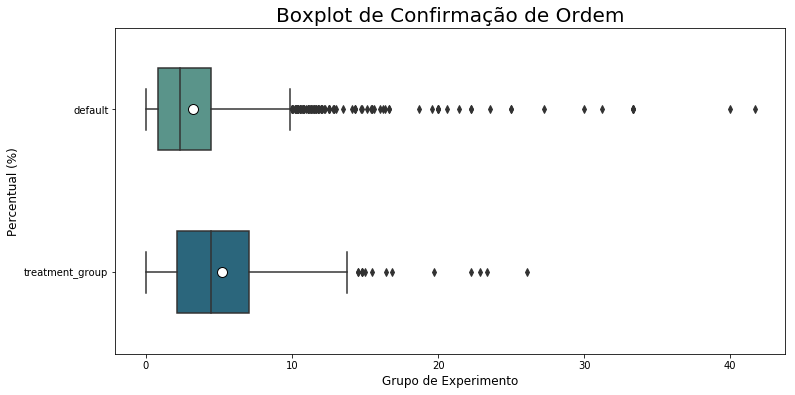

In [210]:
# Construindo boxplot que tem como objetivo visualizar a simetria e dispersão dos dados
## Esse gráfico traz a mediana e quartis dos dados.


df = dataset.loc[(dataset['%_confirmacao'] < 50)]

ax = sns.boxplot(y='ExperimentGroup', x='%_confirmacao', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, data = df, orient='h', width=0.5, palette="crest")
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot de Confirmação de Ordem', fontsize=20)
ax.set_ylabel('Percentual (%)', fontsize=12)
ax.set_xlabel('Grupo de Experimento', fontsize=12)
ax

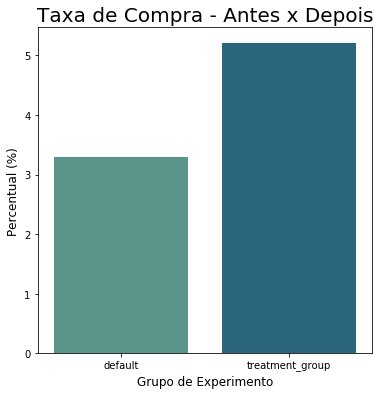

In [211]:
# No gráfico abaixo está informando a média de conversão de compras por acesso com o novo modelo.



media = dataset.groupby(['ExperimentGroup'])['%_confirmacao'].mean().reset_index()

ax = sns.barplot(x="ExperimentGroup", 
                 y="%_confirmacao", 
                 palette="crest",
                 order=media.sort_values('%_confirmacao',ascending = True).ExperimentGroup, 
                 data=media)
ax.figure.set_size_inches(6, 6)
ax.set_title('Taxa de Compra - Antes x Depois', fontsize=20)
ax.set_ylabel('Percentual (%)', fontsize=12)
ax.set_xlabel('Grupo de Experimento', fontsize=12)
ax

In [212]:
media

,ExperimentGroup,%_confirmacao
0,default,3.295112
1,treatment_group,5.209652


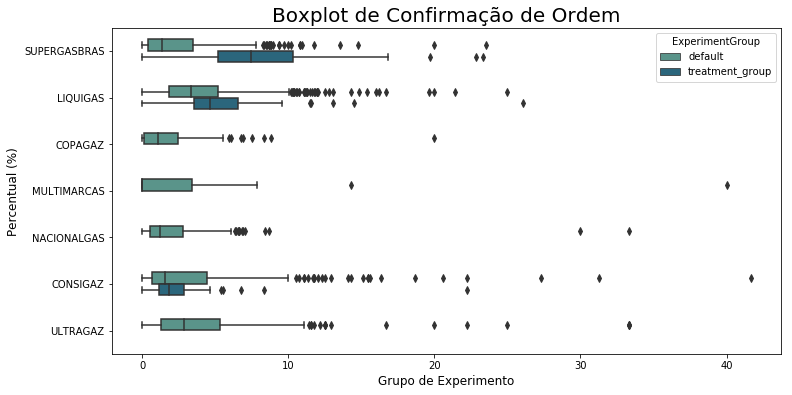

In [213]:
# A título de investigação, foram simulados novos cenários. Como por exemplo a taxa de conversão por distribuidor
## Os valores da Supergasbras, por algum motivo, apresenta performance muito melhor com o novo modelo. 


ax = sns.boxplot(y='Distributor', x='%_confirmacao', data = df, hue = 'ExperimentGroup', orient='h', width=0.5, palette="crest")
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot de Confirmação de Ordem', fontsize=20)
ax.set_ylabel('Percentual (%)', fontsize=12)
ax.set_xlabel('Grupo de Experimento', fontsize=12)
ax

In [214]:
# Construindo tabela para observar as médias por distribuidor
## Pode-se constatar aumento de 225% nas vendas da Supergasbras com o novo modelo
### Já as vendas da Liquigas reduziram em 33% com o novo modelo.


media_distribuidor = dataset.groupby(['Distributor', 'ExperimentGroup'])['%_confirmacao'].mean().reset_index()
media_distribuidor

,Distributor,ExperimentGroup,%_confirmacao
0,CONSIGAZ,default,3.427357
1,CONSIGAZ,treatment_group,2.271999
2,COPAGAZ,default,2.075353
3,LIQUIGAS,default,3.850163
4,LIQUIGAS,treatment_group,5.157071
5,MULTIMARCAS,default,2.559450
6,NACIONALGAS,default,2.534809
7,SUPERGASBRAS,default,2.484892
8,SUPERGASBRAS,treatment_group,8.074375
9,ULTRAGAZ,default,4.025589


# <font color=lightcoral>5) Conclusão</font>
***

O novo modelo aumentou às vendas em Aproximadamente 57,6%. Portanto ele é melhor do que o anterior.

Alguns pontos devem ser investigados com a questão da queda nas vendas da Liquigas por exemplo.

Próximos passos: Seria interessante categorizar as variáveis quantitativas com o objetivo de gerar mais insights, como o exemplo dos distribuidores, e a partir daí compreender os fatores que interfeririam no aumento ou redução das vendas.